# Milestones 1

# A. Introduction

by Handoko Pramulyo | Batch : FTDS-014

Data yang digunakan pada case ini adalah data dari BigQuery Google, which is about `credit_card_default`. Data ini berisi beberapa feature, di antaranya adalah limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month... Lets find the best ML model for this data!

Objective : Buatlah model Classification untuk memprediksi `default_payment_next_month` dgn 7 model yg berbeda.
<br>***6 mandatory, 1 pilihan sendiri.***

**Google Cloud Platform Query**

In [84]:
# select limit_balance, sex, education_level, marital_status, age,
# pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5,
# bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
# from `bigquery-public-data.ml_datasets.credit_card_default`
# LIMIT 27888;

# B. Import Libraries

In [85]:
## Basic
import pandas as pd # Library for Pandas (Dataset and Dataframe)
import numpy as np # Library for Numpy (vector and array)

## Visualization
import seaborn as sns # Library for creating chart seaborn style
import matplotlib.pyplot as plt # Library for creating chart with matplotlib style

## Data split
from sklearn.model_selection import train_test_split # Library untuk split dataset into train & test dataset (each X,y)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Model Improvement
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer

## Save & load file
import joblib
import json

Pada case Machine Learning ini, new library yang akan digunakan adalah scikit-learn (Machine Learning library in Python), library yang dedicated dibuat untuk Machine Learning. Simple and efficient tools for predictive data analysis, Accessible to everybody, and reusable in various contexts, Built on NumPy, SciPy, and matplotlib, Open source, dan sekaligus commercially usable. OK, lets proceed to the next part.

# C. Data Loading

Pada bagian ini, kita akan coba isi dengan proses penyiapan data (pd read) sebelum dilakukan eksplorasi data lebih lanjut (atau yang biasa disebut dengan EDA). Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom (opsional), melihat gambaran umum dari data, mengecek ukuran dataset, dll.

In [86]:
# Load Dataset 
data = pd.read_csv('h8dsft_P1M1_handoko_pramulyo.csv') # Read CSV file
# data = pd.read_excel('filename.xlsx', index_col=None, header=None) # # Read Excel file
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [87]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,-2,379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Data observasi OKE (lebih dari 50 jumlah observasi --> based on sclearn recommendation) dengan jumlah feature yang proporsional, maka yang bisa kita artikan bahwa model yang akan dibuat 'most likely' low possibility untuk overfit (due to low variance which is good. ```Additional conclusion based on least square``` Jennifer Zhao in medium.com).

In [88]:
# Duplicate Dataset
data_copy = data.copy()
label_name = 'default_payment_next_month'

In [89]:
# Check Dataset (looking up for missing value and understanding the dataset Dtype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

oke, semua data adalah int dan float, which is all numerical data. No nulled data!

In [90]:
# Check Dataset
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Berdasarkan dari data, ada beberapa feature yang biasanya ditulisakan secara categorial, seperti sex, level edukasi, dan status pernikahan. But in this data, data categorical tsb sudah dikonversi menjadi numerical. Kemudian nilai dari limit balance cukup luas, dai 10000 sd 800000, namun rata-ratanya ada di angka sekitar 163K. Sebagian besar yang melakukan program ini adalah masyarakat dengan umur di sekitar 35 tahun. Dari data label, kecenderungan payment next month rendah, atau di bawah 50% (dilihat dari nilai mean, yaitu sebesar 0.21 dari total nilai 1). Dari sini kita pun bisa melihat bahwa komposisi data label dari dataset inbalance (jumlah nilai 1 dan 0 sangat jauh berbeda).

# D. Exploratory Data Analysis (EDA)

In [91]:
# Define plot style
plt.style.use('ggplot')

Bagian ini berisi eksplorasi data pada dataset yang sudah kita load pada bagian pertama dengan menggunakan query, grouping, dan visualisasi sederhana (lets find out something interesting within the data). ```Lets find correlation between numerical feature before proceed even further!```

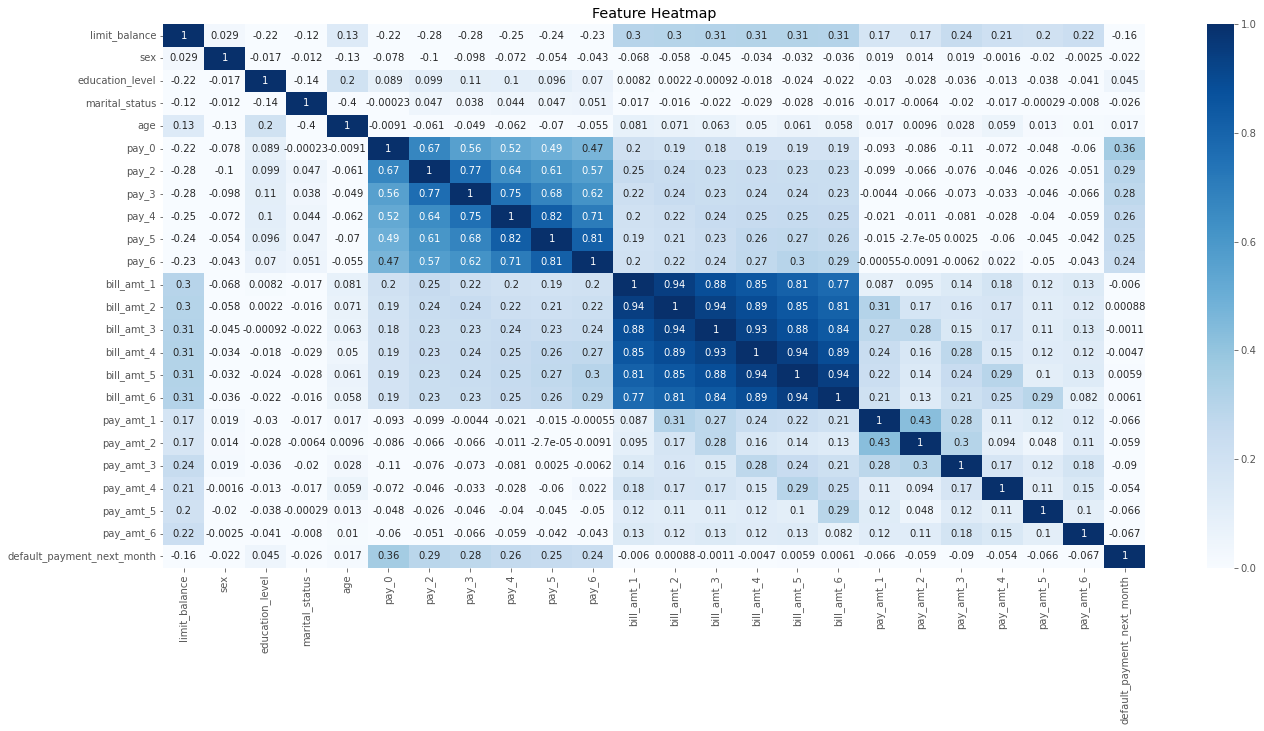

In [92]:
corr = data.corr()

# Use a mask to plot only part of a matrix
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# mask=mask (put this syntax into sns.heatmap argumen)

plt.figure(figsize=(22, 10))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap="Blues")
plt.title('Feature Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Dapat terlihat bahwa `default_payment_next_month` berkorelasi positif dengan beberapa feature, seperti pay_0 sd pay_6, feature lainnya berkorelasi sangat kecil bahkan beberapa feature lainnya berkorelasi negatif. Adapun feature dengan korelasi yang kecil ini unik, karena value yg ada pada feature mereka sebetulnya adalah konversi dari valuenya yang pada dasarnya adalah string, demikian nilai korelasi dari featurenya tidak selalu bisa dijadikan acuan. Namun yang perlu dicatat adalah bahwa beberapa feature ternyata  bersifat multicollinearity which is not good, khususnya untuk model logistic linear.Lets find out the result at the next part.

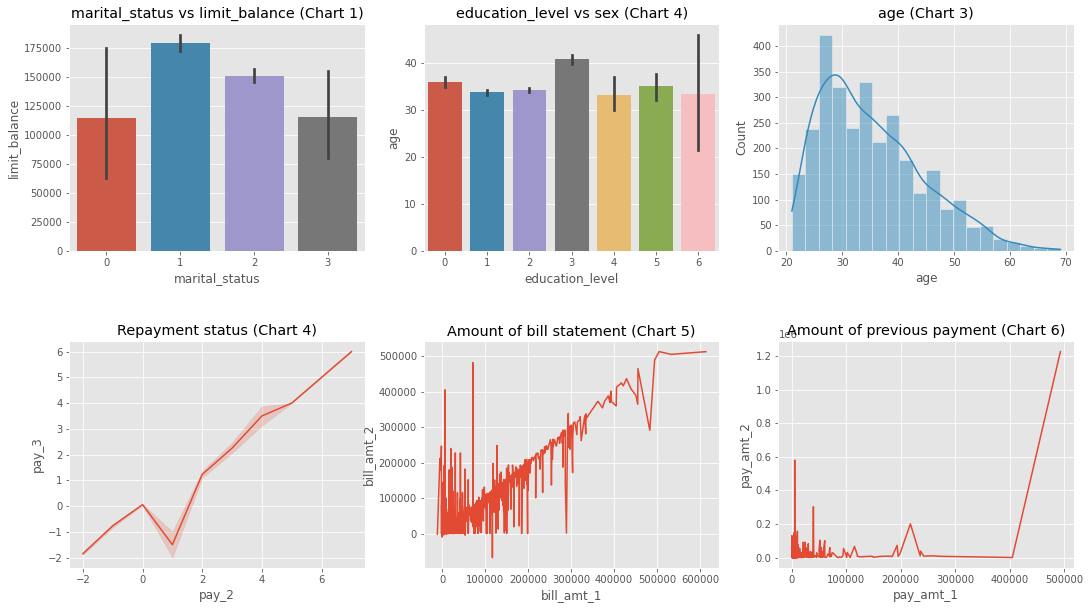

In [93]:
# Create Histogram and Scatter Plot
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
sns.barplot(x='marital_status', y='limit_balance', data=data)
plt.title('marital_status vs limit_balance (Chart 1)')
plt.subplot(2, 3, 2)
sns.barplot(x='education_level', y='age', data=data)
plt.title('education_level vs sex (Chart 4)')
plt.subplot(2, 3, 3)
sns.histplot(data['age'], bins=20, kde=True)
plt.title('age (Chart 3)')
plt.subplot(2, 3, 4)
sns.lineplot(x='pay_2', y='pay_3', data=data)
plt.title('Repayment status (Chart 4)')
plt.subplot(2, 3, 5)
sns.lineplot(x='bill_amt_1', y='bill_amt_2', data=data)
plt.title('Amount of bill statement (Chart 5)')
plt.subplot(2, 3, 6)
sns.lineplot(x='pay_amt_1', y='pay_amt_2', data=data)
plt.title('Amount of previous payment (Chart 6)')

# set the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.show()

Berdasarkan data, Marital status (1=married, 2=single, 3=others), bisa dilihat bahwa sebagian besar keluara yang `sudah menikah ternyata memiliki limit plafon credit yang paling tinggi` diantara status marital yang lain. Kemudian dari tingkat pendidikan (Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown), sebagian besar `lulusan high school berada di umur 40 tahunan`, dan yang lainnnya cukup merata untuk `umur 30 sd 40 tahunan`, kecuali level 6 yg Std nya cukup divers, 20 sd hampir 50. Memang jika dilihat, mayority dari perseorangan yang memiliki program kredit ini berada `pada umur 25 sd 30 tahun`, range umur yg cukup `demanding untuk melakukan kredit` di zaman saat ini. Last but not least, chart 4 dan 5 menunjukkan masing-masing hubungan `Repayment status serta Amount of bill statement dari bulan ke bulan yang berkorelasi positif` (seolah-olah seperti akumulasi dari bulan ke bulan, jika bulan ini delay, maka besar kemungkinan bulan berikutnya juga akan delay dst). Namun status dari payment dari bulan satu ke bulan lainnya tidak berkorelasi tinggi, artinya pembayaran dilakukan bisa jadi secara random. 

# E. Data Preprocessing

Bagian ini berisi proses 1) membuat data train, test, inference (split data X dan y)... 2) Feature selection (merujuk pada heatmap) dll... 3) Split X dan y... 4) handling missing value... 5) hanlding outliers x_train data only...  6) Split data numerical dan categorical untuk train dan test 7) Proses Scaling dan...  8) Encoding ... 9) Concate all

## E1. Data Preparation (Train_Test, & Inference)

In [94]:
# Membuat dataset inference dari dataset master
# Angka 10 tuk define jumlah observasi inference
# Random_state untuk define formula pemilihan data secara random yet wont change
data_inf = data.sample(10, random_state=23)
# Membuat dataset train dan test (exlude inference)
data_train_test = data.drop(data_inf.index)
# Reset Index --> rekomen untuk dilakukan after berhasil dilakukan split antara data train_test dan inference
data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)

In [95]:
data_train_test.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [96]:
# Inference dataset is ready! akan digukan untuk melihat nilai rating (scheme rating unknown)
data_inf.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,20000.0,2,2,2,30.0,0.0,0.0,0.0,0.0,0,0,21302.0,18842.0,19370.0,19355.0,17155.0,18660.0,1300.0,1800.0,1106.0,435.0,1599.0,1000.0,0
1,320000.0,1,1,1,51.0,0.0,0.0,0.0,0.0,0,0,483184.0,290784.0,277482.0,282869.0,253903.0,249866.0,20373.0,13000.0,11160.0,8418.0,8325.0,8602.0,0
2,110000.0,2,2,1,40.0,1.0,2.0,2.0,2.0,2,2,92638.0,90905.0,95768.0,97004.0,99005.0,101213.0,600.0,7300.0,3700.0,3700.0,4000.0,3800.0,0
3,190000.0,1,2,2,41.0,0.0,0.0,0.0,0.0,0,0,33798.0,34931.0,36064.0,37160.0,38237.0,39464.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,0
4,210000.0,2,2,1,37.0,0.0,0.0,-2.0,-2.0,-2,-2,22908.0,32513.0,6192.0,2885.0,8419.0,2810.0,32513.0,9.0,8.0,8444.0,3118.0,0.0,1


Oke, now we have 2 datasets, which is Train_Test & Inference (we pick 10 observation data), ***each index has been reset!***

## E2. Feature Selection

All Feature will be used

## E3. Splitting between `X` (Features) and `y` (Target)

In [97]:
# Split between X (Features) and y (Target/label/goal)
X = data_train_test.drop(label_name, axis=1) 
y = data_train_test[label_name]
# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# Find out the size of each dataset
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2364, 23)
Test Size  :  (591, 23)


Data Split yang optimal dari data train dan test sebetulnya memang bergantung pada byk faktor seperti the use of case (each case of data might be approached differently), the structure of the model, dimension of the data, etc. Namun secara umum, mendefinisikan train data sebesar 80% dan test data sebesar 20% adalah permulaan pembuatan model yang baik (Pragati Baheti from Microsoft, v7labs.com).

## E4. Handling Missing Values

In [98]:
# Check Missing Values in `X_train`
print('Amount of X_train nulled value : ', X_train.isnull().sum().sum())
# Check Missing Values in `X_test`
print('Amount of X_test nulled value : ', X_test.isnull().sum().sum())
# Check Missing Values in `y_train`
print('Amount of y_train nulled value : ', y_train.isnull().sum())
# Check Missing Values in `y_test`
print('Amount of y_test nulled value : ', y_test.isnull().sum())

Amount of X_train nulled value :  0
Amount of X_test nulled value :  0
Amount of y_train nulled value :  0
Amount of y_test nulled value :  0


**No Nulled value**

## E5. Handling Outlier

Outliers handling tidak akan kita lakukan pada feature nominal hasil konversi dari value category (kita asumsikan no outliers), seperti `sex, education_level, marital_status, serta pay_0 sd pay_6` (karena hasil konversi feature categorical). 

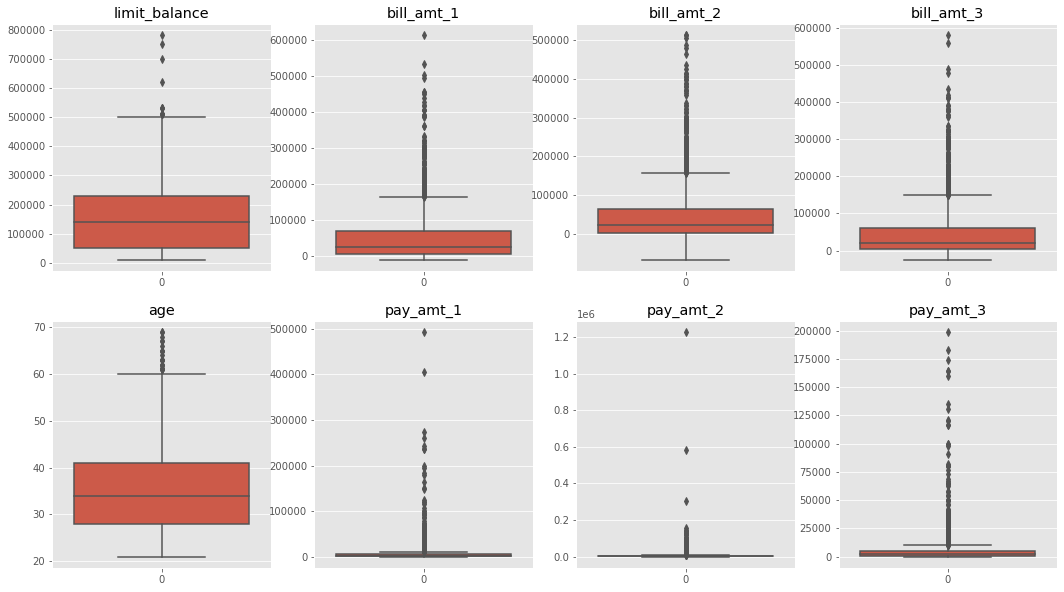

In [99]:
# Create Chart
plt.figure(figsize=(18, 10))
plt.subplot(2, 4, 1), sns.boxplot(data=X_train['limit_balance']), plt.title(f'limit_balance') 
plt.subplot(2, 4, 2), sns.boxplot(data=X_train['bill_amt_1']), plt.title(f'bill_amt_1')
plt.subplot(2, 4, 3), sns.boxplot(data=X_train['bill_amt_2']), plt.title(f'bill_amt_2')
plt.subplot(2, 4, 4), sns.boxplot(data=X_train['bill_amt_3']), plt.title(f'bill_amt_3')
plt.subplot(2, 4, 5), sns.boxplot(data=X_train['age']), plt.title(f'age')
plt.subplot(2, 4, 6), sns.boxplot(data=X_train['pay_amt_1']), plt.title(f'pay_amt_1')
plt.subplot(2, 4, 7), sns.boxplot(data=X_train['pay_amt_2']), plt.title(f'pay_amt_2')
plt.subplot(2, 4, 8), sns.boxplot(data=X_train['pay_amt_3']), plt.title(f'pay_amt_3')
plt.show()

Pada Chart box di atas, maka dapat dilihat data outliers pada setiap features

In [100]:
pd.set_option("display.max.columns",None) # display all columns
pd.DataFrame(X_train.skew(axis=0), columns=['skewness']).T

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
skewness,0.973624,-0.422216,0.856057,0.00253,0.760925,0.853995,0.844213,0.796274,1.019956,0.96937,0.856067,2.5835,2.57578,2.685958,2.567985,2.496798,2.498121,11.733754,29.13717,7.787325,8.248242,10.077691,9.984889


Untuk teknik Sensoring ini, proses akan dilakukan menjadi dua bagian... bagian pertama adalah proses sensoring dengan windsorizer pada feature dengan distribusi 0.5 > skew > 1 serta -1 > skew > -0.5 (yang kemudian dinamakan dengan variable windsoriser_skew dengan metode IQR fold 1.5). Kemudian bagian yang lain adalah windsoriser_eskew dengan feature yang distribusinya extrem skew, < -1 dan > 1. Cara windsorizer dipilih karena semua data outliers ini legitimate (bukan noise yang harus kita drop datanya), demikian kita adjust data outliers ini ke batas atas dan bawahnya sehingga semua informasi dari data tetap dapat diperhitungkan oleh model ML.

In [101]:
# Create the capper for distribution with normal skew
windsoriser_skew = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['limit_balance','age'])

windsoriser_skew.fit(X_train)
X_train = windsoriser_skew.transform(X_train)

# Create the capper for distribution with extreme skew
windsoriser_eskew = Winsorizer(capping_method='iqr',# choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6'])

windsoriser_eskew.fit(X_train)
X_train = windsoriser_eskew.transform(X_train)

**Outliers has been handled with windsorizer!**

# F. Pipeline & GridSearch

## F1. Cross Val Score

Untuk memenuhi persyaratan dalam soal, berikut adalah 7 model ML yang akan digunakan dalam prediksi.

In [102]:
# Define models for cross value score
svc = SVC()
log = LogisticRegression(max_iter=500)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
gau = GaussianNB()
xbt = xgb.XGBClassifier()

In [103]:
# Create dictionary untuk dataframe
dict_model = {'SVC':svc,'Logistic':log,'DecisionTree':dtc,'RandomForest':rfc,'KNeighbors':knn,'GaussianNB':gau,'XGBoost':xbt}

# Create empty list
list_mean = []
list_std = []
list_mean_plus_std = []
list_mean_min_std = []
list_nama_model = []

# For Loop value dari cross_val_score untuk setiap model
for i,v in dict_model.items():
    scores = cross_val_score(v, X_train, y_train, cv=5)
    
    list_mean.append(scores.mean())
    list_std.append(scores.std())
    list_mean_plus_std.append(scores.mean()+scores.std())
    list_mean_min_std.append(scores.mean()-scores.std())
    list_nama_model.append(i)

df_result = pd.DataFrame(np.array([list_mean, list_std, list_mean_plus_std, list_mean_min_std]), columns=list_nama_model, index=['Score mean','Score std','mean_plus_std','mean_min_std'])
df_result

,SVC,Logistic,DecisionTree,RandomForest,KNeighbors,GaussianNB,XGBoost
Score mean,0.790186,0.790610,0.731388,0.825294,0.759300,0.572732,0.816412
Score std,0.000820,0.001203,0.012526,0.007569,0.009386,0.047128,0.004151
mean_plus_std,0.791006,0.791813,0.743914,0.832863,0.768685,0.619860,0.820563
mean_min_std,0.789367,0.789407,0.718862,0.817725,0.749914,0.525604,0.812261


Dari hasil score, maka dapat dilihat bahwa RandomForest ada pada urutan score mean paling tinggi, dan diurutan kedua adalah XGBoost. Secara basic konsep, cross_val_score sebetulnya dibuat untuk memudahkan data scientist dalam memilih model terbaik berdasarkan score terbaik: dengan kriteria 1) score STD terendeh (menunjukkan konsistensi result) dan 2) adalah akurasi. `Oleh karena itu, dalam case ini, meski RandomForest memilki score mean terbaik, namun secara Score STD... XGBoost masih lebih baik dibandingkan dengan RandomForest.`

**Note : Semua model akan dilakukan tuning parameter**
> XgBoost -> Model pilihan sendiri (lihat hasil perhitungannya pada bagian F4).

## F2. Define Column Transformer

In [104]:
# display all columns skewness
pd.set_option("display.max.columns",None)
pd.DataFrame(X_train.skew(axis=0), columns=['skewness']).T

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
skewness,0.887851,-0.422216,0.856057,0.00253,0.69141,0.853995,0.844213,0.796274,1.019956,0.96937,0.856067,1.769232,1.748224,1.75381,1.733278,1.715073,1.727216,1.62576,1.63391,1.82354,1.824598,1.839106,1.859929


Berdasarkan masing-masing feature skew, maka setiap feature dengan skewness normal, proses caling yang digunakan adalah StandardScaler (contoh: sex dan marital status), kemudian untuk feature dengan skewness normal, proses scaling yang digunakan adalah MinMaxScaler. Serta feature lainnya (skewness extrem) proses scalingnya menggunakan RobustScaler.

In [105]:
# Define columnn name for scaling and encoding
numeric_features_ss = ['sex', 'marital_status']
numeric_features_mm = ['education_level', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_5', 'pay_6']
numeric_features_rb = ['limit_balance', 'pay_4','bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

# Define scaling and encoding technique
numeric_transformer_sc = Pipeline([("scaler1", StandardScaler())])
numeric_transformer_mm = Pipeline([("scaler2", MinMaxScaler())])
numeric_transformer_rb = Pipeline([("scaler3", RobustScaler())])

# Define Transformer Column
preprocessor = ColumnTransformer(
    transformers=[
        ("num1", numeric_transformer_sc, numeric_features_ss),
        ("num2", numeric_transformer_mm, numeric_features_mm),
        ("num3", numeric_transformer_rb, numeric_features_rb)
    ]
)

## F3. ALL Model Tuning (exclude XGBoost)

### A. Log Reg

In [106]:
param = [
        {'classifier': [LogisticRegression(max_iter=10000)],
        'classifier__multi_class': ['multinomial', 'auto', 'ovr']}
        ]

# Simplify the process of building chains of transformations and models
pipe = Pipeline([('preprocessing', preprocessor), ("classifier", LogisticRegression())])

# Define GridSearch with cross validation to find the best model 
grid_search = GridSearchCV(pipe, param_grid=param, cv=5, scoring="f1")

# Fit GridSearch Model to Train
grid_search.fit(X_train,y_train)
# Identify the best model and Hyperparameter
print("Best parameters: {}".format(grid_search.best_params_))
print('='*30)
print("Best cross-validation f1 score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'classifier': LogisticRegression(max_iter=10000, multi_class='multinomial'), 'classifier__multi_class': 'multinomial'}
Best cross-validation f1 score: 0.34


### B. SVC

In [107]:
param = [
        {'classifier': [SVC()],
        'classifier__kernel': ['rbf'],
        'classifier__C': [50, 100, 150]}
        ]

# Simplify the process of building chains of transformations and models
pipe = Pipeline([('preprocessing', preprocessor), ("classifier", LogisticRegression())])

# Define GridSearch with cross validation to find the best model 
grid_search = GridSearchCV(pipe, param_grid=param, cv=5, scoring="f1")

# Fit GridSearch Model to Train
grid_search.fit(X_train,y_train)
# Identify the best model and Hyperparameter
print("Best parameters: {}".format(grid_search.best_params_))
print('='*30)
print("Best cross-validation f1 score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'classifier': SVC(C=100), 'classifier__C': 100, 'classifier__kernel': 'rbf'}
Best cross-validation f1 score: 0.40


### C. DecisionTreeClassifier

In [108]:
param = [
        {'classifier': [DecisionTreeClassifier(random_state=42)],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__splitter': ['best', 'random'],
        'classifier__max_depth': [1, 2, 3, 4, 5]}
        ]

# Simplify the process of building chains of transformations and models
pipe = Pipeline([('preprocessing', preprocessor), ("classifier", LogisticRegression())])

# Define GridSearch with cross validation to find the best model 
grid_search = GridSearchCV(pipe, param_grid=param, cv=5, scoring="f1")

# Fit GridSearch Model to Train
grid_search.fit(X_train,y_train)
# Identify the best model and Hyperparameter
print("Best parameters: {}".format(grid_search.best_params_))
print('='*30)
print("Best cross-validation f1 score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'classifier': DecisionTreeClassifier(max_depth=4, random_state=42, splitter='random'), 'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__splitter': 'random'}
Best cross-validation f1 score: 0.52


### D. RandomForestClassifier

In [109]:
param = [
        {'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__criterion': ['gini','entropy'],
        'classifier__n_estimators': [50,100,150],
        'classifier__max_depth': [3, 4, 5, 6, 7]}
        ]

# Simplify the process of building chains of transformations and models
pipe = Pipeline([('preprocessing', preprocessor), ("classifier", RandomForestClassifier())])

# Define GridSearch with cross validation to find the best model 
grid_search = GridSearchCV(pipe, param_grid=param, cv=5, scoring="f1")

# Fit GridSearch Model to Train
grid_search.fit(X_train,y_train)

# Identify the best model and Hyperparameter
print("Best parameters: {}".format(grid_search.best_params_))
print('='*30)
print("Best cross-validation f1 score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'classifier': RandomForestClassifier(max_depth=7, random_state=42), 'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__n_estimators': 100}
Best cross-validation f1 score: 0.46


### E. KNeighborsClassifier

In [110]:
param = [
        {'classifier': [KNeighborsClassifier()],
        'classifier__weights': ['uniform','distance'],
        'classifier__metric': ['manhattan','minkowski','euclidean'],
        'classifier__n_neighbors': [5, 10, 15, 20]},
        ]

# Simplify the process of building chains of transformations and models
pipe = Pipeline([('preprocessing', preprocessor), ("classifier", LogisticRegression())])

# Define GridSearch with cross validation to find the best model 
grid_search = GridSearchCV(pipe, param_grid=param, cv=5, scoring="f1")

# Fit GridSearch Model to Train
grid_search.fit(X_train,y_train)
# Identify the best model and Hyperparameter
print("Best parameters: {}".format(grid_search.best_params_))
print('='*30)
print("Best cross-validation f1 score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'classifier': KNeighborsClassifier(metric='manhattan', weights='distance'), 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Best cross-validation f1 score: 0.30


### F. GaussianNB

In [111]:
param = [
        {'classifier': [GaussianNB()],
        'classifier__var_smoothing': np.logspace(0,-9, num=100)}
        ]

# Simplify the process of building chains of transformations and models
pipe = Pipeline([('preprocessing', preprocessor), ("classifier", LogisticRegression())])

# Define GridSearch with cross validation to find the best model 
grid_search = GridSearchCV(pipe, param_grid=param, cv=5, scoring="f1")

# Fit GridSearch Model to Train
grid_search.fit(X_train,y_train)
# Identify the best model and Hyperparameter
print("Best parameters: {}".format(grid_search.best_params_))
print('='*30)
print("Best cross-validation f1 score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'classifier': GaussianNB(var_smoothing=2.310129700083158e-05), 'classifier__var_smoothing': 2.310129700083158e-05}
Best cross-validation f1 score: 0.52


## F4. XGBoost Tuning & Validation Score Result

In [112]:
param = [
        {'classifier': [xgb.XGBClassifier()],
        'classifier__learning_rate': [0, 1], #default=0.3
        'classifier__max_depth': [1, 2, 3], #default=6
        'classifier__min_child_weight': [0, 1, 2, 3, 4, 5], #default=0.3
        'classifier__min_split_loss': [0, 10, 20, 30, 40]} #default=0
        ]

# Simplify the process of building chains of transformations and models
pipe = Pipeline([('preprocessing', preprocessor), ("classifier", xgb.XGBClassifier())])

# Define GridSearch with cross validation to find the best model 
grid_search = GridSearchCV(pipe, param_grid=param, cv=5, scoring="f1")

# Fit GridSearch Model to Train
grid_search.fit(X_train,y_train)

# Identify the best model and Hyperparameter
print("Best parameters: {}".format(grid_search.best_params_))
print('='*30)
print("Best cross-validation f1 score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=0, min_split_loss=20,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, predictor=None,
              random_state=None, reg_alpha=None, ...), 'classifier__learning_rate': 1, 'classifier__max_depth': 2, 'classifier__min_child_weight': 0, 'classifier__min_split_loss': 20}
Best cross-validation f1 score: 0.51


In [113]:
# Define optimal model
xgb_optimal = xgb.XGBClassifier(learning_rate= 1,max_depth= 2,min_child_weight= 1,min_split_loss=20)
# Calculate cross_val_score
scores = cross_val_score(xgb_optimal, X_train, y_train, cv=5)
print('cross_val_score mean : ',scores.mean())
print('cross_val_score std : ',scores.std())

cross_val_score mean :  0.8379797183502348
cross_val_score std :  0.01232248902681154


Dari hasil after tuning, maka diperoleh parameter terbaik untuk XgBoost. Sebelum tuning, score mean adalah sebesar `0.816412` dgn Std `0.004151`. After tuning dilakukan, maka diperoleh perbaikan score (improve) menjadi `0.837979` dengan Std `0.012322`. This is quite an improvement!

In [114]:
# Predict Train and Test Label with the best model
y_pred_train=grid_search.best_estimator_.predict(X_train)
y_pred_test=grid_search.best_estimator_.predict(X_test)

# G. XGBoost Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model...<br>
berdasarkan metrics yang dipilih... `Confusion Metrix (classification_report)`.

In [115]:
print('Log: accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('Log: accuracy score test : ',accuracy_score(y_test,y_pred_test))

Log: accuracy score train :  0.8371404399323181
Log: accuracy score test :  0.8409475465313029


jika dilihat dari akurasi, maka jika acuan akurasi yang baik adalah sebesar > 0.9, maka model ini sebetulnya masih blm dikatakan good-fit (meskipun akurasi score dari train dan test tidak berbeda jauh).

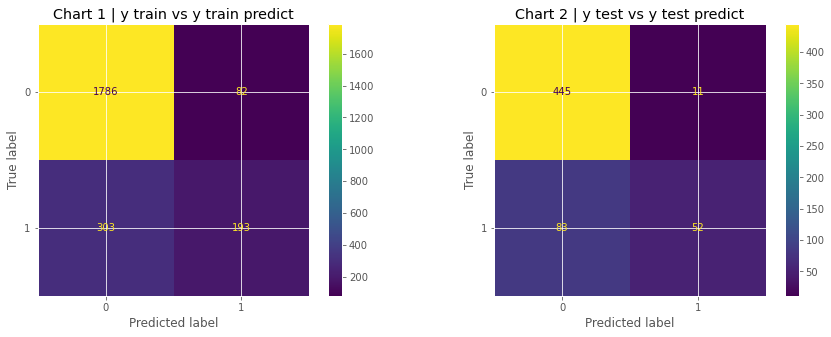

In [116]:
cm_train = confusion_matrix(y_train, y_pred_train, labels=grid_search.best_estimator_.classes_)
cm_test = confusion_matrix(y_test, y_pred_test, labels=grid_search.best_estimator_.classes_)

fig, ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=grid_search.best_estimator_.classes_).plot(ax=ax[0])
ax[0].set_title('Chart 1 | y train vs y train predict')
ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=grid_search.best_estimator_.classes_).plot(ax=ax[1])
ax[1].set_title('Chart 2 | y test vs y test predict')

# set the spacing between subplots
# plt.subplots_adjust(hspace=0.4)

plt.show()

Confussion matrix menunjukkan bahwa masih terdapat kesalahan prediksi category. Seperti terlihat pada chart 1, data label train yang diprediksi bernilai 0 (next month no payment) dengan benar adalah sebesar 1786, sedangkan yang salah prediksi adalah sebesar 303 (ratio sekitar 17%). Justru yang berbahaya adalah jumlah prediksi value 1 (next month yes payment) yang benar adalah sebanyak 193, yang salah ada sebanyak 82 orang (ratio 0.42). Maka misal in case banking, maka bank akan kehilangan amount of payment yang seharusnys dibayarkan para pemilik kredit bulan depan (loss of payment chance = risk of bad cash flow).

In [117]:
# classification_report =========== Train
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1868
           1       0.70      0.39      0.50       496

    accuracy                           0.84      2364
   macro avg       0.78      0.67      0.70      2364
weighted avg       0.82      0.84      0.82      2364



In [118]:
# classification_report ============ Test
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       456
           1       0.83      0.39      0.53       135

    accuracy                           0.84       591
   macro avg       0.83      0.68      0.71       591
weighted avg       0.84      0.84      0.82       591



Dari hasil classification_report, maka terlihat cukup jelas bahwa baik train dan test menghasilkan nilai f1 score yang tidak merata di label 0 (0.90) dan 1 (0.50 dan 0.53). Hasil kualitas prediksi untuk label 0 overall sudah baik (0.9), namun prediksi untuk label 1 masih sangat buruk (0.5 sd 0.53). So, penambahan dataset dengan label 1 akan sangat membantu dalam pembuatan model yang lebih baik (menjadi balance). Overall, model masih under fit. 

# H. Model Saving

In [119]:
# Save the Files
with open('grid_search.best_estimator_.pkl', 'wb') as file_1:
  joblib.dump(grid_search.best_estimator_, file_1)

# I. Inferencing

## I1. Load Model

In [120]:
# # Load All Files 
with open('grid_search.best_estimator_.pkl', 'rb') as file_1:
  grid_search = joblib.load(file_1)

## I2. Predict

In [121]:
# Predict using Linear Regression 
y_pred_inf = grid_search.predict(data_inf)

# Create DataFrame of Rating's Prediction 
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['predict '+label_name])

In [122]:
# Concate between Inference-Set and Rating's Prediction
result = pd.concat([data_inf[label_name], y_pred_inf_df], axis=1)
result

,default_payment_next_month,predict default_payment_next_month
0,0,0
1,0,0
2,0,1
3,0,0
4,1,0
5,1,1
6,1,0
7,0,0
8,1,1
9,0,0


Dari hasil predik di data inf, maka dapat dilihat bahwa jumlah data yang benar terprediksi adalah sebesar 7 observasi (salah 3 dari 10)

# J. Conclusion

Dari hasil persoalan yang sudah dikerjakan, maka dapat disimpulkan bahwa proses pembuatan ML berhasil dilakukan (dengan XgBoost). Insight dari proses pengolahan dari data ini adalah bahwa penentuan validation score dapat membantu data science dalam penentuan model terbaik (model dengan konsistensi -Std- hasil prediksi yang paling baik + akurasi model overall) sebelum dilakukan tuning hyperparameter pada model tersebut. Adapun setelah dilakukan proses tuning menggunakan pipe dan GridSearch (+cross validation), maka proses pemilihan parameter akan jauh lebih cepat dan sederhana dengan hasil komputasi yang bebas dari knowledge leak serta hasil output model yang paling optimal (sudah automatic tanpa harus melakukan step secara berulang). Meskipun demikian, jumlah komposisi dataset target yang balance akan sangat membantu hasil dari pembuatan model yang lebih baik. Bisa dillihat bahwa hasil classification report bahwa F1 Score overall untuk target 1 masih jauh dari bagus (meskipun akurasi model cukup baik namun blm good-fit). Model ini masih perlu diperbaiki, karena jika dilihat dari presisi dan recallnya, maka ada beberapa possibility saat banking mengalami kerugian with no payment dari para kreditur.

Selain dengan menambah data target 1 sehingga data lebih balance, improvement lain yang bisa dilakukan adalah dengan melakukan pendekatan lain pada outliers. XGBoost dalam beberapa sumber: kurang perform pada dataset yang mengandung outliers namun perform dari sisi flexibility parameter, power untuk multiprocesing, lbh baik dari beberapa model boosting lain, serta sudah build-in missing data handling dalam modelnya. So suggestion... misalnya, instead of winsorizing, bisa dilakukan drop outliers, dll), atau bisa juga dengan improvement via implementasi PCA serta unsupervise model sehingga model yang dibuat bisa jauh lebih optimal lagi.

## Conceptual Problems

>**Apakah fungsi parameter criterion pada Decision Tree?**

Criterion secara sederhana adalah parameter yang bisa kita gunakan untuk menentukan bagaimana proses split pada decision tree akan diukur (purity, kondisi saat salah satu cabang tree bernilai 0). Biasanya sklearn secara default akan men-set "gini" tetapi pilihan lain seperti "entropi" juga bisa digunakan (formula perhitungan purity).

>**Apakah fungsi dari pruning pada Tree model?**

Pruning bisa dikatakan sebagai teknik kompresi data, atau teknik yang dapat mengurangi jumlah decision tree dengan menghapus bagian tree yang tidak penting dan berlebihan dalam proses klasifikasi (jumlah tree based on purity). Pemangkasan dapat mengurangi kompleksitas pengklasifikasi akhir, dan dengan cara ini kita dapat meningkatkan akurasi prediksi sekaligus menghindari model yang overfit.

>**Bagaimana cara memilih K yang optimal pada KNN?**

Selain men-setting K dengan angka gajil, cara terbaik dalam menentukan K yang optimal adalah dengan melakukan GridSearch pada model tersebut. GridSearch memungkinkan Data Science dalam melakukan pembuatan model dengan nilai K yang berbeda-beda, namun dengan hasil model KKN dengan K terbaik.

>**Jelaskan apa yang kalian ketahui tentang Cross Validation!**

Cross Validation sebetulnya adalah teknik yang bisa kita gunakan untuk melakukan evaluasi pada model dengan skenario data input segmentasi (folding) yang berbeda-beda sehingga knowledge leak dan kondisi overfit pada model bisa dihindari oleh data science. Kita dapat melihat akurasi, sekaligus Std dari sebuah model dengan Cross Validation sehingga model yang kita buat dapat melakukan prediksi sebaik mungkin.

>**Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!**

Dalam case categorical model evaluation, accuracy menunjukkan ketepatan suatu model dalam memprediksi suatu target. Jika nilai akurasi mendekati 1, maka ketepatan prediksi yang dibuat oleh model sudah sangat baik. Adapun presisi menunjukkan nilai dari ketepatan hasil prediksi dari target vs prediksi yang keliru. Kemudian Recall adalah nilai yang menunjukkan jumlah actual data yang benar dengan overall data prediksi. Presisi dan Recall secara umum fokus pada pengukuran nilai kualitas hasil prediksi dan actual targetnya seperti apa... nah representasi dari keduanya ini lah yang disebut dengan F1 Score. 